In [54]:
import numpy as np
import pandas as pd

In [55]:
df=pd.read_csv("./UDEMY_TSA_FINAL/Data/macrodata.csv",index_col=0,parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [56]:
df.index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

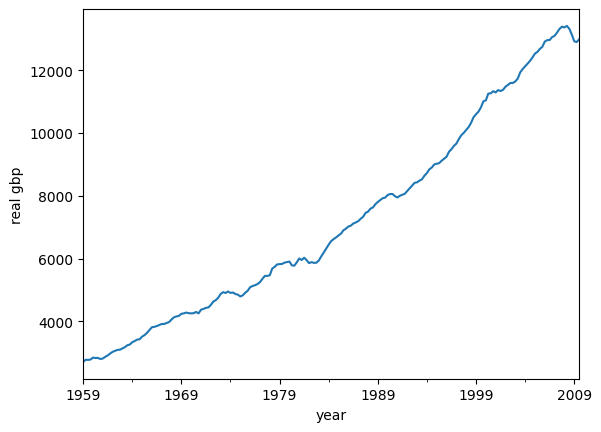

In [57]:
ax=df["realgdp"].plot();
ax.autoscale(axis="x",tight=True)
ax.set(ylabel="real gbp",xlabel="year");

## Statmodels

In [58]:
from statsmodels.tsa.filters.hp_filter import hpfilter


In [59]:
#unpack the tuples
gdp_cycle, gdp_trend =hpfilter(df["realgdp"],lamb=1600)

In [60]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp_cycle, Length: 203, dtype: float64

In [61]:
df["trend"]=gdp_trend

In [62]:
df.columns

Index(['year', 'quarter', 'realgdp', 'realcons', 'realinv', 'realgovt',
       'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp', 'pop', 'infl', 'realint',
       'trend'],
      dtype='object')

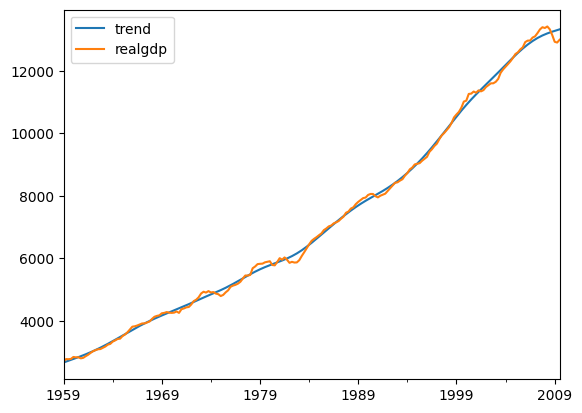

In [63]:
df[["trend","realgdp"]].plot();

# Seasonal Decomposition

In [64]:
airline=pd.read_csv("./UDEMY_TSA_FINAL/Data/airline_passengers.csv",index_col="Month",parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [65]:
airline.dropna(inplace=True)

##### this is exponential increasing time series

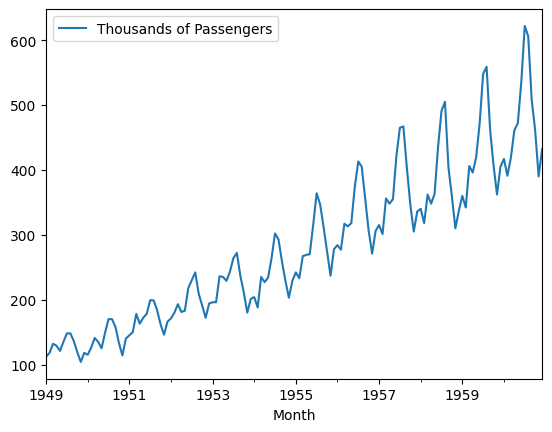

In [66]:
airline.plot();

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

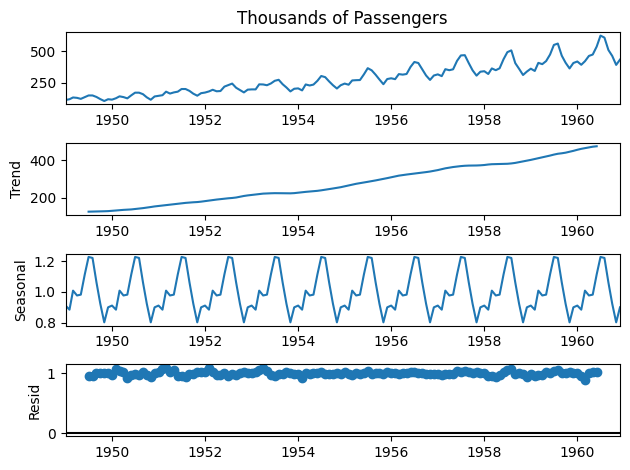

In [68]:
result=seasonal_decompose(airline["Thousands of Passengers"],model="multiplicative")
result.plot();

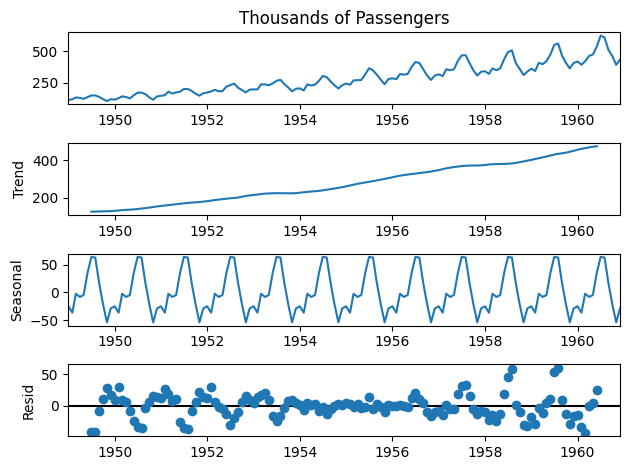

In [69]:
result2=seasonal_decompose(airline["Thousands of Passengers"],model="additive")
result2.plot();

<AxesSubplot:xlabel='Month'>

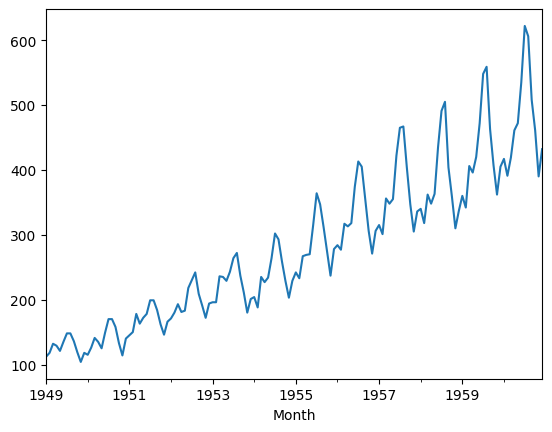

In [70]:
result.observed.plot()

<AxesSubplot:xlabel='Month'>

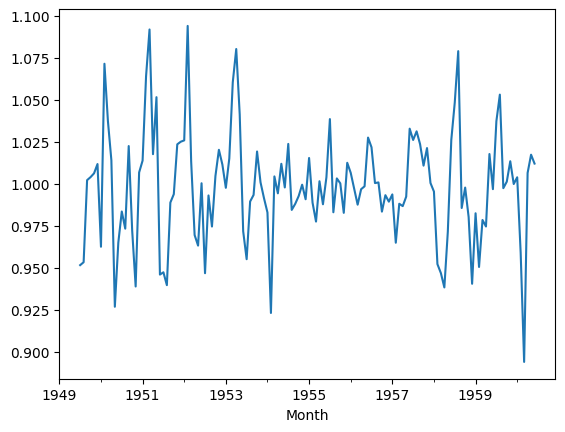

In [71]:
result.resid.plot()

In [72]:
result.resid.head(20)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
1949-11-01    1.006270
1949-12-01    1.011812
1950-01-01    0.962603
1950-02-01    1.071467
1950-03-01    1.037447
1950-04-01    1.014048
1950-05-01    0.926903
1950-06-01    0.965041
1950-07-01    0.983557
1950-08-01    0.973372
Name: resid, dtype: float64

# Simple Moving Average

In [73]:
airline["6-month-SMA"]=airline["Thousands of Passengers"].rolling(window=6).mean()

In [74]:
airline["12-month-SMA"]=airline["Thousands of Passengers"].rolling(window=12).mean()

In [75]:
airline.head(13)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


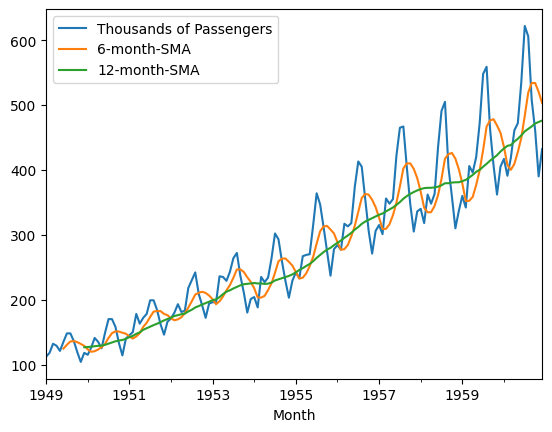

In [76]:
airline.plot();

### Exponentially Weighted Moving Average

In [77]:
airline["EWMA12"]=airline["Thousands of Passengers"].ewm(span=12,adjust=False).mean()


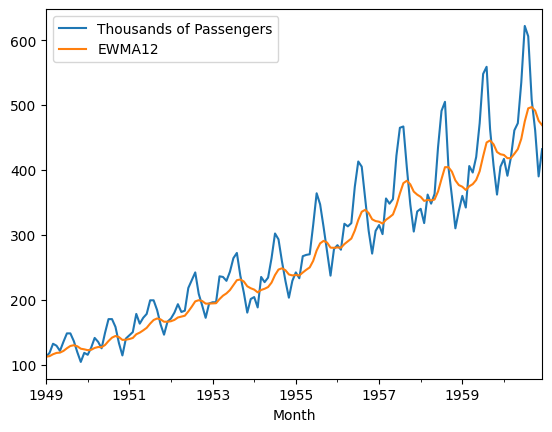

In [78]:
airline[["Thousands of Passengers","EWMA12"]].plot();

In [79]:
airline["Thousands of Passengers"].ewm(span=12,adjust=True).mean()
#when adjust is False y0=x0, exponentially weighted calculation recursively,
# when adjusut is true, the caluclation is series 

Month
1949-01-01    112.000000
1949-02-01    115.250000
1949-03-01    121.787529
1949-04-01    124.064224
1949-05-01    123.231685
                 ...    
1960-08-01    494.898620
1960-09-01    496.914217
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01    469.053629
Name: Thousands of Passengers, Length: 144, dtype: float64

In [80]:
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,112.923077
1949-03-01,132,NaN,NaN,115.857988
1949-04-01,129,NaN,NaN,117.879836
1949-05-01,121,NaN,NaN,118.359861


##### SMA vs EWMA

<AxesSubplot:xlabel='Month'>

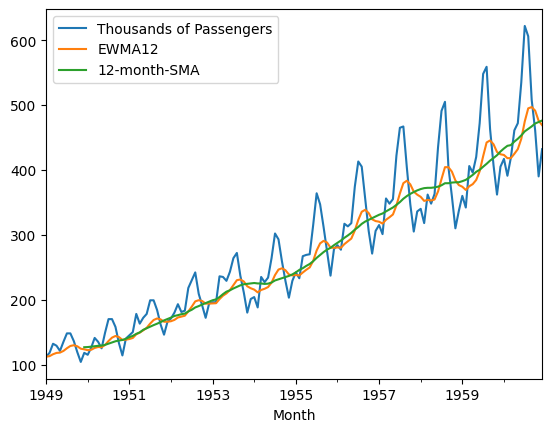

In [81]:
airline[["Thousands of Passengers","EWMA12","12-month-SMA"]].plot()

### SET FREQ

In [82]:
df=pd.read_csv("./UDEMY_TSA_FINAL/Data/airline_passengers.csv",index_col="Month",parse_dates=True)

In [83]:
df.dropna(inplace=True)

In [84]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [85]:
df.index.freq="MS"
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [86]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


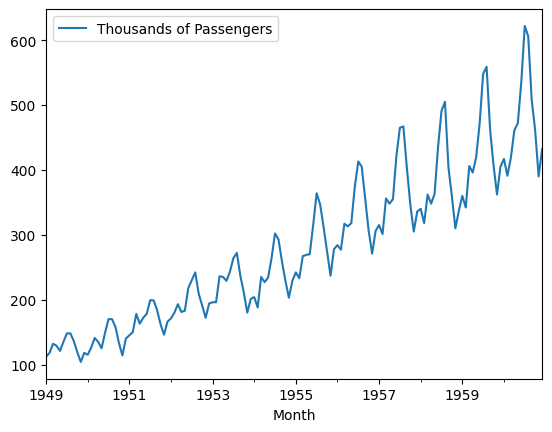

In [87]:
df.plot();

## Simple Exponential Smoothing

In [88]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [89]:
span=12 # "span" refers to the length of the seasonal component of a time series
#depends on seaaonality, for yearlly 12 is picked
alpha=2/(span+1) #for span s>=1

In [90]:
df["EWMA"]=df["Thousands of Passengers"].ewm(alpha=alpha,adjust=False).mean()

In [91]:
model=SimpleExpSmoothing(df["Thousands of Passengers"])

In [92]:
fittedmodel=model.fit(smoothing_level=alpha,optimized=False)

In [93]:
fittedmodel.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [94]:
df["SES12"]=fittedmodel.fittedvalues.shift(-1)

In [95]:
#df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

In [96]:
df.head()

,Thousands of Passengers,EWMA,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


## Double Exponential Smoothing

In [97]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [98]:
model=ExponentialSmoothing(df["Thousands of Passengers"],trend="add")

In [99]:
df["DESadd12"]=model.fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA,SES12,DESadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


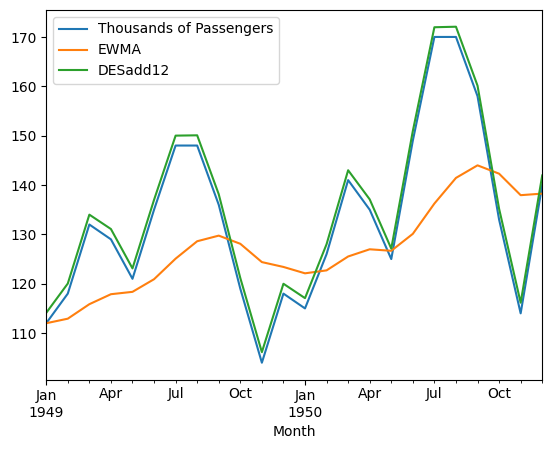

In [100]:
df[["Thousands of Passengers","EWMA","DESadd12"]].iloc[:24].plot();

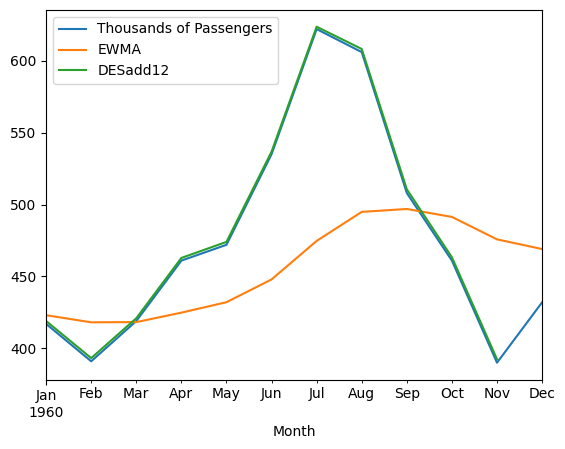

In [101]:
df[["Thousands of Passengers","EWMA","DESadd12"]].iloc[-12:].plot();

In [102]:
model=ExponentialSmoothing(df["Thousands of Passengers"],trend="mul")

In [103]:
df["DESmul12"]=model.fit().fittedvalues.shift(-1)

In [104]:
df.head()

,Thousands of Passengers,EWMA,SES12,DESadd12,DESmul12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267


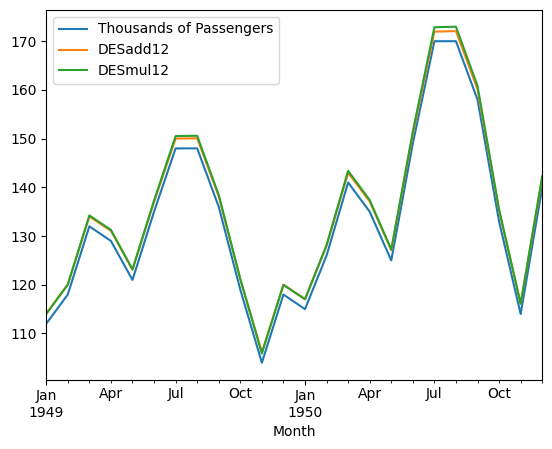

In [105]:
df[["Thousands of Passengers","DESadd12","DESmul12"]].iloc[:24].plot();

## Triple Exponential Smoothing 

In [107]:
model=ExponentialSmoothing(df["Thousands of Passengers"],trend="add",seasonal="add",seasonal_periods=12)

In [109]:
df["TESadd12"]=model.fit().fittedvalues

In [110]:
df.head()

,Thousands of Passengers,EWMA,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,111.959998
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,120.193337
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,134.676835
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,131.407263
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,124.643743


In [111]:
model=ExponentialSmoothing(df["Thousands of Passengers"],trend="mul",seasonal="mul",seasonal_periods=12)

In [114]:
df["TESmul12"]=model.fit().fittedvalues

c:\Users\Selim\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [115]:
df.head()

,Thousands of Passengers,EWMA,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,111.959998,111.595648
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,120.193337,118.842606
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,134.676835,133.333853
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,131.407263,127.899963
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,124.643743,120.979016


In [116]:
df.columns

Index(['Thousands of Passengers', 'EWMA', 'SES12', 'DESadd12', 'DESmul12',
       'TESadd12', 'TESmul12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

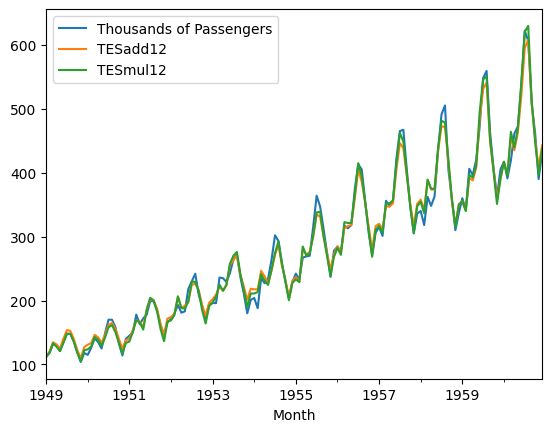

In [118]:
df[['Thousands of Passengers','TESadd12', 'TESmul12']].plot()

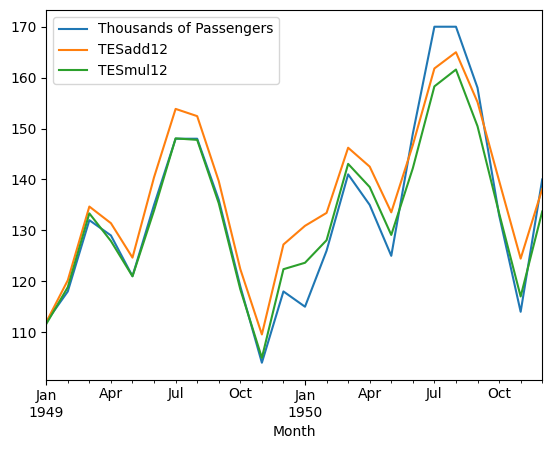

In [120]:
df[['Thousands of Passengers','TESadd12', 'TESmul12']].iloc[:24].plot();

<AxesSubplot:xlabel='Month'>

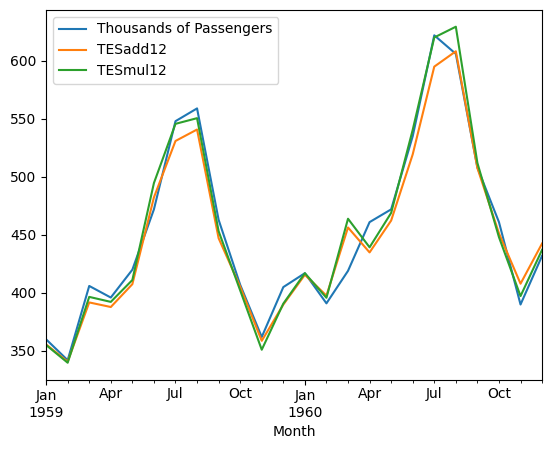

In [121]:
df[['Thousands of Passengers','TESadd12', 'TESmul12']].iloc[-24:].plot()